# Lesson 1 - Problem Set

Please solve the questions in this notebook and submit the completed notebook. The timestamp of submission will be considered the timestamp of completion.

1. What is the Central Limit Theorem? $_{5\text{pts}}$

2. Suppose I sell Banh Mi, and the probability that I will receive a customer in any given hour is modeled by the data in `customer_pmf`. Write a python function which shows how the CLT arises from the provided distribution.

3. Let's assume that `voter_age_country` contains age data for the entire country of Thailand, and `voter_age_province` contains age data for the province of Amnat Charoen, which is the second most populous province in Thailand. You work for a political firm which is trying to determine voter turn out in Amnat Charoen. In order to more effectively target your advertising dollars, you decide to see analyze the average age of voters in Shanta. Thus you decide to test whether the average age of voters in Amnat Charoen differs from the average age of voters in the entire population of Thailand.
> Using the Hypothesis Testing methodology outlined during class, determine whether the average age of voters in Amnat Charoen differs from the entire population. $_{20\text{pts}}$

In [1]:
import numpy as np

#### Problem 2 data ###
customer_pmf = np.random.poisson(12, size=50000)

#### Problem 3 data ####
voter_age_country = np.concatenate([np.random.poisson(35,size=15000),np.random.poisson(10,size=10000)])
voter_age_province = np.concatenate([np.random.poisson(30,size=30),np.random.poisson(10,size=20)])

### 1.What is the Central Limit Theorem
---

### 2.Write a python function which shows how the CLT arises from the provided distribution.
---

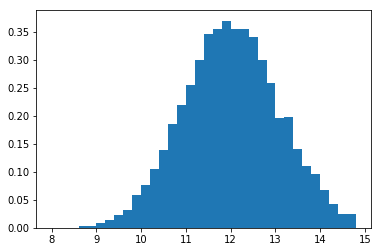

In [38]:
import matplotlib.pyplot as plt

def clt(ar,n):
    rs = np.array([])
    for i in range(n): 
        sample = np.random.choice(ar,size=10)
        rs=np.append(rs,np.mean(sample))
    return(rs)

plt.hist(
    clt(customer_pmf,10000),
    density=True,
    bins=np.arange(8,15,.2)
)
plt.show()

### 3. Determine whether the average age of voters in Amnat Charoen differs from the entire population
---

** Hypothesises **

* H0 : Average age of voter in Amnat Charoen is not different from entire population average age.
* H1 : Average age of voter in Amnat Charoen is different from entire population average age.
* Significant level a = 5%
Assume H0, we'll calculate how likely we get a sample at least extreme as ```voter_age_province``` sample.

The distribution of the sample means is normally distributed with :
* the mean equal to population mean: mp -> approximately calcualated from ```voter_age_county``` data 

**mp = 25.04044**

* standard deviation of the sampling distribution : sm -> approximately calcualated from ```voter_age_province``` sample standard deviation / sample_size**0.5 (because sample size > 30) 

**sm = 1.4576**

We'll determine how likely we get a sample at least extreme as ```voter_age_provice``` by calculating how many *standard deivation* (```sm```) away the sample mean (```ms```) from the population mean ```mp``` (z-score)

**ms = 21.18**

**z = -2.65**

In [34]:
mp = np.mean(voter_age_country)
print(mp)

25.04044


In [35]:
sm = np.std(voter_age_province)/len(voter_age_province)**.5
print(sm)

1.4575843028792534


In [36]:
ms = np.mean(voter_age_province)
print(ms)

21.18


In [37]:
z = (ms - mp)/sm

In [33]:
print(z)

-2.6485191919083118

From z-score table, we calculated **p-value = 0.0040** 
>-> With significant level of 5%, we can reject null hypothesis and conclude that voter age in Amnat Charoen average age differ from population average age

![z score](https://s3-ap-southeast-1.amazonaws.com/subscriber.images/maths/2017/09/27091456/word-image.png)